In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("emissions.csv")
df2 = df[["project_name", "cpu_energy", "ram_energy"]]

In [13]:
df2 = df2.set_index("project_name")

Text(0.5, 0, '')

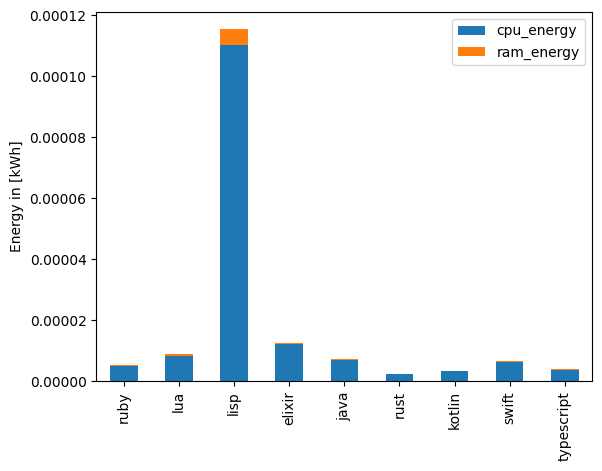

In [14]:
ax = df2.plot.bar(stacked=True)
plt.ylabel("Energy in [kWh]")
plt.xlabel("")
#ax.bar_label(ax.containers[0])

In [15]:
df2

,cpu_energy,ram_energy
project_name,,
ruby,0.000005,2.414232e-07
lua,0.000008,4.008995e-07
lisp,0.000110,5.257660e-06
elixir,0.000012,5.731893e-07
java,0.000007,3.286878e-07
rust,0.000002,1.078157e-07
kotlin,0.000003,1.568961e-07
swift,0.000006,3.063740e-07
typescript,0.000004,1.823850e-07


In [16]:
df2["total_energy"] = df2.cpu_energy + df2.ram_energy

In [17]:
df2

,cpu_energy,ram_energy,total_energy
project_name,,,
ruby,0.000005,2.414232e-07,0.000005
lua,0.000008,4.008995e-07,0.000009
lisp,0.000110,5.257660e-06,0.000115
elixir,0.000012,5.731893e-07,0.000013
java,0.000007,3.286878e-07,0.000007
rust,0.000002,1.078157e-07,0.000002
kotlin,0.000003,1.568961e-07,0.000004
swift,0.000006,3.063740e-07,0.000007
typescript,0.000004,1.823850e-07,0.000004


In [18]:
df2.sort_values("total_energy", ascending=False)

,cpu_energy,ram_energy,total_energy
project_name,,,
lisp,0.000110,5.257660e-06,0.000115
elixir,0.000012,5.731893e-07,0.000013
lua,0.000008,4.008995e-07,0.000009
java,0.000007,3.286878e-07,0.000007
swift,0.000006,3.063740e-07,0.000007
ruby,0.000005,2.414232e-07,0.000005
typescript,0.000004,1.823850e-07,0.000004
kotlin,0.000003,1.568961e-07,0.000004
rust,0.000002,1.078157e-07,0.000002
